# Keywords

- **Peptides:** Peptides are short chains of amino acids that are the building blocks of proteins.
- **Previous amino acid:** The "previous amino acid" refers to the amino acid that comes before a specific amino acid in a peptide sequence.
- **K or R:** These are specific amino acids.
- **K:** K stands for lysine
- **R:** R stands for arginine
- **SPP:** Stands for `Plasmodium proteins signal peptide peptidase` - is an enzyme found in malaria-causing parasites called Plasmodium. Its job is to remove specific "signal peptides" from newly made proteins as they are being processed inside the parasite's cells.
- **NAT:** stands for `N-acetyltransferase` - N-acetyltransferase (NAT) is an enzyme that helps modify different substances inside living organisms. It transfers a small molecule called an acetyl group to other molecules, changing their properties... NATs are involved in a wide range of biological processes, including the metabolism of drugs, toxins, and endogenous compounds in organisms. They play a role in detoxification by modifying and facilitating the elimination of certain substances from the body.
- **Signal Peptides:** Signal peptides are like addresses that guide the proteins to the right place within the parasite's cells. Once the proteins reach their destination, SPP cuts off these signal peptides, allowing the proteins to function properly.
- **Research question 4:** In what peptides does the previous amino acid not = K or R... does this differ between SPP vs. NAT?

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import display, HTML

# Load the dataset
data = pd.read_excel('Malaria_Research_Data.xlsx', header=0)

# calculate the total protein spectra in each sample 
total_spectra = data.groupby('Biological sample category')['Protein percentage of total spectra'].sum()

# Normalize the protein percentages within each group
data['Normalized protein percentage'] = data.groupby('Biological sample category')['Protein percentage of total spectra'].transform(lambda x: (x / x.sum()) * 100)

# Calculate the corrected normalized protein percentage
data['Corrected normalized protein percentage'] = data.groupby('Biological sample category')['Normalized protein percentage'].transform(lambda x: (x / x.sum()) * 100)

# print the modified dataset 
print(data)

                                  Experiment name Biological sample category   
0      SPP vs. NAT coIP results recieved 11.15.22                        SPP  \
1      SPP vs. NAT coIP results recieved 11.15.22                        SPP   
2      SPP vs. NAT coIP results recieved 11.15.22                        SPP   
3      SPP vs. NAT coIP results recieved 11.15.22                        SPP   
4      SPP vs. NAT coIP results recieved 11.15.22                        SPP   
...                                           ...                        ...   
19259    SPP vs. NAT coIP results recieved 1.9.23                        NAT   
19260    SPP vs. NAT coIP results recieved 1.9.23                        NAT   
19261    SPP vs. NAT coIP results recieved 1.9.23                        NAT   
19262    SPP vs. NAT coIP results recieved 1.9.23                        NAT   
19263    SPP vs. NAT coIP results recieved 1.9.23                        NAT   

                                       

In [56]:
# Filter the dataset to include only the relevant columns for analysis, such as "Biological sample category," "Peptide sequence," "Previous amino acid,"
relevant_columns = ['Biological sample category', 'Peptide sequence', 'Previous amino acid']
filtered_data = data[relevant_columns]
print(filtered_data)

      Biological sample category   Peptide sequence Previous amino acid
0                            SPP           TNLNVNKK                   ?
1                            SPP           TNLNVNKK                   ?
2                            SPP           TNLNVNKK                   ?
3                            SPP          FQSIPINIK                   R
4                            SPP          FQSIPINIK                   R
...                          ...                ...                 ...
19259                        NAT      VTLEQLYNGATKK                   K
19260                        NAT  YHSSVLHQTEVTCNTCR                   R
19261                        NAT       DNAVDVLVCNIK                   K
19262                        NAT         DQGGESLSLR                   K
19263                        NAT          LNLVNIYEK                   K

[19264 rows x 3 columns]


In [57]:
# Filter the peptides where the previous amino acid is not equal to K or R.
filtered_data = filtered_data[(filtered_data['Previous amino acid'] != 'K') & (filtered_data['Previous amino acid'] != 'R')]

print(filtered_data)

      Biological sample category                 Peptide sequence   
0                            SPP                         TNLNVNKK  \
1                            SPP                         TNLNVNKK   
2                            SPP                         TNLNVNKK   
59                           SPP                   MKLNISNPLNNVQK   
60                           SPP                   MKLNISNPLNNVQK   
...                          ...                              ...   
19003                        NAT                   AEQFTEDIGVVNKR   
19004                        NAT                   AEQFTEDIGVVNKR   
19125                        NAT  IDDPINMSSMVGPVLNNDMNTINNNVTSNKK   
19126                        NAT                 NKHINENLAIIDNISK   
19197                        NAT                   ADRYENQVENELGK   

      Previous amino acid  
0                       ?  
1                       ?  
2                       ?  
59                      -  
60                      -  
...

In [58]:
spp_filtered_data = filtered_data[filtered_data['Biological sample category'] == 'SPP']
nat_filtered_data = filtered_data[filtered_data['Biological sample category'] == 'NAT']

In [59]:
print(nat_filtered_data)

      Biological sample category                 Peptide sequence   
7435                         NAT              PIPNNPGAGENATDPVFVK  \
7575                         NAT                   ADRYENQVENELGK   
7576                         NAT                   ADRYENQVENELGK   
7577                         NAT                   ADRYENQVENELGK   
7578                         NAT                   ADRYENQVENELGK   
...                          ...                              ...   
19003                        NAT                   AEQFTEDIGVVNKR   
19004                        NAT                   AEQFTEDIGVVNKR   
19125                        NAT  IDDPINMSSMVGPVLNNDMNTINNNVTSNKK   
19126                        NAT                 NKHINENLAIIDNISK   
19197                        NAT                   ADRYENQVENELGK   

      Previous amino acid  
7435                    M  
7575                    M  
7576                    M  
7577                    M  
7578                    M  
...

In [60]:
print(spp_filtered_data)

      Biological sample category Peptide sequence Previous amino acid
0                            SPP         TNLNVNKK                   ?
1                            SPP         TNLNVNKK                   ?
2                            SPP         TNLNVNKK                   ?
59                           SPP   MKLNISNPLNNVQK                   -
60                           SPP   MKLNISNPLNNVQK                   -
...                          ...              ...                 ...
15417                        SPP         TNTSNELK                   M
15455                        SPP        TTYTLVLLR                   M
15700                        SPP   VLTELGTQITNAFR                   M
15701                        SPP   VLTELGTQITNAFR                   M
15744                        SPP      TSEFWPDLDFK                   M

[233 rows x 3 columns]


In [85]:
# Filter the NAT peptides where the previous amino acid is not equal to K or R
nat_filtered_data = nat_filtered_data[(nat_filtered_data['Previous amino acid'] != 'K') & (nat_filtered_data['Previous amino acid'] != 'R')]

# Combine duplicated peptide sequences and count their occurrences
nat_peptides_count = nat_filtered_data['Peptide sequence'].value_counts().reset_index()
nat_peptides_count.columns = ['Peptide sequence', 'Count']

# Create a scrollable table to display the NAT peptides
table_html = nat_peptides_count.to_html(index=False)

# Wrap the table HTML with a div element and apply CSS for the scroll bar
html_content = f'<div style="max-height: 400px; overflow-y: scroll;">{table_html}</div>'

# Display the HTML content
display(HTML(html_content))

Peptide sequence,Count
AQLAENTVLDESIQK,23
SLQVIDNNDFQHILR,23
SNVSNALVWELTR,21
MTDQFTIR,18
MKLNISNPLNNVQK,10
TNTSNELK,10
MEDANKPK,9
AEQFTEDIGVVNKR,8
ATTLDVQHER,8
ADRYENQVENELGK,6


In [62]:
# Filter the SPP peptides where the previous amino acid is not equal to K or R
spp_filtered_data = spp_filtered_data[(spp_filtered_data['Previous amino acid'] != 'K') & (spp_filtered_data['Previous amino acid'] != 'R')]

# Combine duplicated peptide sequences and count their occurrences
spp_peptides_count = spp_filtered_data['Peptide sequence'].value_counts().reset_index()
spp_peptides_count.columns = ['Peptide sequence', 'Count']

# Create a scrollable table to display the SPP peptides
table_html = spp_peptides_count.to_html(index=False)

# Wrap the table HTML with a div element and apply CSS for the scroll bar
html_content = f'<div style="max-height: 400px; overflow-y: scroll;">{table_html}</div>'

# Display the HTML content
display(HTML(html_content))

Peptide sequence,Count
SLQVIDNNDFQHILR,33
AQLAENTVLDESIQK,17
SNVSNALVWELTR,14
ATIRPVANVYSTNGK,11
AEQFTEDIGVVNKR,9
MKLNISNPLNNVQK,7
ATTLDVQHER,7
ADRYENQVENELGK,7
MEDANKPK,6
MTDQFTIR,6


In [63]:
# Get the filtered peptide sequences from NAT and SPP
nat_filtered_peptides = set(nat_filtered_data[nat_filtered_data['Previous amino acid'] != 'K']['Peptide sequence'])
spp_filtered_peptides = set(spp_filtered_data[spp_filtered_data['Previous amino acid'] != 'K']['Peptide sequence'])

# Find the peptide sequences that are different between NAT and SPP
differing_peptides = nat_filtered_peptides.symmetric_difference(spp_filtered_peptides)

# Create a DataFrame with the differing peptide sequences and their biological sample category
differing_peptides_df = pd.DataFrame({'Peptide sequence': list(differing_peptides),
                                      'Biological sample category': ''})

# Update the biological sample category for NAT peptides
differing_peptides_df.loc[differing_peptides_df['Peptide sequence'].isin(nat_filtered_peptides),
                          'Biological sample category'] += 'NAT'

# Update the biological sample category for SPP peptides
differing_peptides_df.loc[differing_peptides_df['Peptide sequence'].isin(spp_filtered_peptides),
                          'Biological sample category'] += 'SPP'

# Display the differing peptide sequences with their biological sample category
print(differing_peptides_df)

                   Peptide sequence Biological sample category
0                   SSTEKNEVINSNDTR                        SPP
1                        QKVNIEMNEK                        NAT
2                       MLNLSSLLISK                        NAT
3                        TLIENLNSDK                        NAT
4                       AHCTEYMNAPK                        SPP
5         SGNNVQEEDSTFHVSNLYSETEIKK                        SPP
6                          MIGIQEGR                        SPP
7                         NKYEEVQNK                        NAT
8                         SNLTAAEEK                        SPP
9   IDDPINMSSMVGPVLNNDMNTINNNVTSNKK                        NAT
10              PIPNNPGAGENATDPVFVK                        NAT
11                         VLDINLFR                        NAT
12                     SSVSTLPYIGSK                        SPP
13                    LSNVGTNANNVNK                        NAT
14                       SNIHTLAEYR                    

In [64]:
# Filter the peptides where the previous amino acid is not equal to K or R
filtered_data = filtered_data[(filtered_data['Previous amino acid'] != 'K') & (filtered_data['Previous amino acid'] != 'R')]

# Group the filtered data by 'Biological sample category' and 'Peptide sequence'
grouped_data = filtered_data.groupby(['Biological sample category', 'Peptide sequence']).size().reset_index(name='Count')

# Filter the grouped data to include only the peptides that have different counts between NAT and SPP
different_peptides = grouped_data.groupby('Peptide sequence').filter(lambda x: len(x) == 2 and x['Count'].nunique() > 1)

# Print the different peptides with their respective 'Biological sample category'
print(different_peptides)

    Biological sample category                    Peptide sequence  Count
0                          NAT                      ADRYENQVENELGK      6
2                          NAT                      AEQFTEDIGVVNKR      8
5                          NAT                     AQLAENTVLDESIQK     23
6                          NAT  AQLAENTVLDESIQKVEVLNHNGETTSFYNEVEK      3
8                          NAT            ASMDHNAQDELVDYEDDENILDSK      1
11                         NAT                     ATIRPVANVYSTNGK      4
12                         NAT                          ATTLDVQHER      8
13                         NAT                          AYPLLEDDLR      3
19                         NAT                           GCILNVHPK      4
31                         NAT                       MDNGNNEILYSVK      1
32                         NAT                         MDSQEYIPQYK      3
33                         NAT                            MEDANKPK      9
40                         NAT        

In [65]:
# Get the peptide sequences from NAT and SPP
nat_peptides = set(nat_filtered_data['Peptide sequence'])
spp_peptides = set(spp_filtered_data['Peptide sequence'])

# Filter the SPP peptides based on previous amino acid and non-existence in NAT
filtered_spp_peptides = spp_filtered_data[
    (spp_filtered_data['Previous amino acid'] != 'K') &
    (spp_filtered_data['Previous amino acid'] != 'R') &
    (~spp_filtered_data['Peptide sequence'].isin(nat_peptides))
]

# Display the filtered SPP peptides
print(filtered_spp_peptides)

      Biological sample category           Peptide sequence   
218                          SPP         MNNLNILFFNNLGENILK  \
731                          SPP  SQNNPLSVCVADNLINYDIQNESFR   
1309                         SPP                LQNNKLFDNLR   
1310                         SPP                  QLQNITVQK   
1432                         SPP                 SNIHTLAEYR   
2064                         SPP                   MIGIQEGR   
2616                         SPP               MNEQDYLPIEIK   
3316                         SPP             VLTELGTQITNAFR   
3630                         SPP                  SNVLEECIK   
3991                         SPP    AEQFTEDIGVVNKRLLEPVPFVK   
4016                         SPP            SSTEKNEVINSNDTR   
4024                         SPP   SGNNVQEEDSTFHVSNLYSETEIK   
4025                         SPP  SGNNVQEEDSTFHVSNLYSETEIKK   
4026                         SPP  SGNNVQEEDSTFHVSNLYSETEIKK   
4498                         SPP        MDELNKEEIVDNINN

In [66]:
# Get the peptide sequences from SPP and NAT
spp_peptides = set(spp_filtered_data['Peptide sequence'])
nat_peptides = set(nat_filtered_data['Peptide sequence'])

# Filter the NAT peptides based on previous amino acid and non-existence in SPP
filtered_nat_peptides = nat_filtered_data[
    (nat_filtered_data['Previous amino acid'] != 'K') &
    (nat_filtered_data['Previous amino acid'] != 'R') &
    (~nat_filtered_data['Peptide sequence'].isin(spp_peptides))
]

# Display the filtered NAT peptides
print(filtered_nat_peptides)

      Biological sample category                 Peptide sequence   
7435                         NAT              PIPNNPGAGENATDPVFVK  \
7875                         NAT                    MDMLNPQFEEIGK   
8709                         NAT              TTEQEFEKVELTADGGVIK   
8729                         NAT                      MEIVNEGWVFK   
8762                         NAT                      MLNLSSLLISK   
9608                         NAT                       TLIENLNSDK   
9609                         NAT                       TLIENLNSDK   
9610                         NAT                       TLIENLNSDK   
9620                         NAT                       MDDKEQIKEK   
9832                         NAT                         PKQITDIR   
9883                         NAT        STVNELLNYFVVNDDNDDLNKNDEK   
9896                         NAT                         NKDMPINK   
9897                         NAT                        NKYEEVQNK   
10012                        NAT  

In [73]:
# # Get the peptide sequences from NAT and SPP
# nat_peptides = set(nat_filtered_data['Peptide sequence'])
# spp_peptides = set(spp_filtered_data['Peptide sequence'])

# # Filter the SPP peptides based on previous amino acid and non-existence in NAT
# filtered_spp_peptides = spp_filtered_data[
#     (spp_filtered_data['Previous amino acid'] != 'K') &
#     (spp_filtered_data['Previous amino acid'] != 'R') &
#     (~spp_filtered_data['Peptide sequence'].isin(nat_peptides))
# ]

# # Filter out duplicated peptide sequences
# unique_spp_peptides = filtered_spp_peptides.drop_duplicates(subset='Peptide sequence')

# # Display the unique SPP peptides without row numbers
# print(unique_spp_peptides['Peptide sequence'].to_string(index=False))

# Get the peptide sequences from NAT and SPP
nat_peptides = set(nat_filtered_data['Peptide sequence'])
spp_peptides = set(spp_filtered_data['Peptide sequence'])

# Filter the SPP peptides based on previous amino acid and non-existence in NAT
filtered_spp_peptides = spp_filtered_data[
    (spp_filtered_data['Previous amino acid'] != 'K') &
    (spp_filtered_data['Previous amino acid'] != 'R') &
    (~spp_filtered_data['Peptide sequence'].isin(nat_peptides))
]

# Filter out duplicated peptide sequences
unique_spp_peptides = filtered_spp_peptides.drop_duplicates(subset='Peptide sequence')

# Display the unique SPP peptides without row numbers and aligned to the left
peptide_sequences = unique_spp_peptides['Peptide sequence'].to_list()
for peptide in peptide_sequences:
    print(peptide.ljust(30))

MNNLNILFFNNLGENILK            
SQNNPLSVCVADNLINYDIQNESFR     
LQNNKLFDNLR                   
QLQNITVQK                     
SNIHTLAEYR                    
MIGIQEGR                      
MNEQDYLPIEIK                  
VLTELGTQITNAFR                
SNVLEECIK                     
AEQFTEDIGVVNKRLLEPVPFVK       
SSTEKNEVINSNDTR               
SGNNVQEEDSTFHVSNLYSETEIK      
SGNNVQEEDSTFHVSNLYSETEIKK     
MDELNKEEIVDNINNEQAK           
INNIIINK                      
KINEIINKYSSNK                 
VKNLIENVEIK                   
SSVSTLPYIGSK                  
VAHNNVLPNVHLHK                
ASTEEVSQER                    
ATSEELKQLR                    
AHCTEYMNAPK                   
SNLTAAEEK                     
INNKYGSK                      
LTLTGNGK                      
GALDESTPVPSR                  
PTISVYEDDLFEK                 
TSEFWPDLDFK                   


In [74]:
# Get the peptide sequences from SPP and NAT
spp_peptides = set(spp_filtered_data['Peptide sequence'])
nat_peptides = set(nat_filtered_data['Peptide sequence'])

# Filter the NAT peptides based on previous amino acid and non-existence in SPP
filtered_nat_peptides = nat_filtered_data[
    (nat_filtered_data['Previous amino acid'] != 'K') &
    (nat_filtered_data['Previous amino acid'] != 'R') &
    (~nat_filtered_data['Peptide sequence'].isin(spp_peptides))
]

# Filter out duplicated peptide sequences
unique_nat_peptides = filtered_nat_peptides.drop_duplicates(subset='Peptide sequence')

# Display the unique NAT peptides without row numbers and aligned to the left
peptide_sequences = unique_nat_peptides['Peptide sequence'].to_list()
for peptide in peptide_sequences:
    print(peptide.ljust(30))

PIPNNPGAGENATDPVFVK           
MDMLNPQFEEIGK                 
TTEQEFEKVELTADGGVIK           
MEIVNEGWVFK                   
MLNLSSLLISK                   
TLIENLNSDK                    
MDDKEQIKEK                    
PKQITDIR                      
STVNELLNYFVVNDDNDDLNKNDEK     
NKDMPINK                      
NKYEEVQNK                     
VLDINLFR                      
IFDLSISK                      
QKVNIEMNEK                    
LSNVGTNANNVNK                 
NSNQKHWSDIIACAVHTK            
VKEQGLNITNVYNR                
KKINELEK                      
KKQEENLINQLQNNR               
ALDDAEAQK                     
SVPTLSNKPETVDLLVLAPGEK        
DNGENIEK                      
DQSENILINNQK                  
PIPNNPGAGENAFDPVFVK           
EEQPINNVNK                    
SDVFSIFK                      
IEILNEIK                      
LSFINYMLYK                    
IDDPINMSSMVGPVLNNDMNTINNNVTSNKK
NKHINENLAIIDNISK              


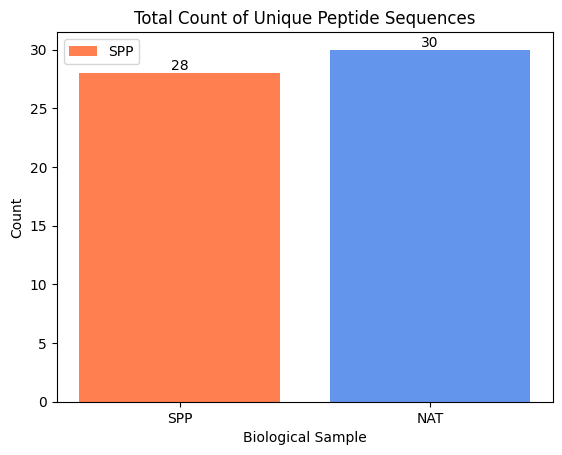

In [76]:
# Calculate the count of unique peptide sequences in SPP and NAT
spp_count = len(unique_spp_peptides)
nat_count = len(unique_nat_peptides)

# Define the colors for the bars
colors = ['#FF7F50', '#6495ED']

# Create a bar chart
categories = ['SPP', 'NAT']
counts = [spp_count, nat_count]

plt.bar(categories, counts, color=colors)

# Add labels and title
plt.xlabel('Biological Sample')
plt.ylabel('Count')
plt.title('Total Count of Unique Peptide Sequences')

# Add data labels above each bar
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add legend
plt.legend(['SPP', 'NAT'])

# Display the bar chart
plt.show()

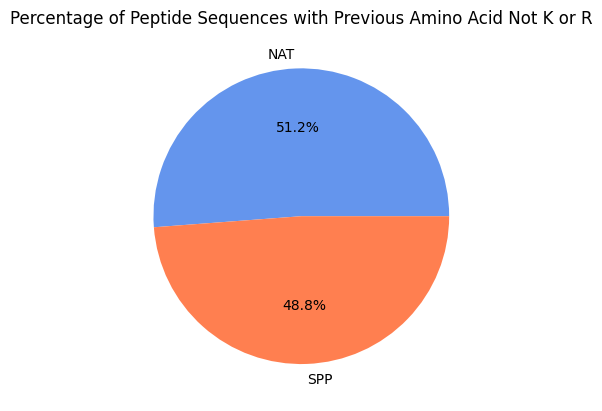

In [78]:
import matplotlib.pyplot as plt

# Calculate the percentage of NAT and SPP peptide sequences
nat_percentage = len(unique_nat_peptides) / len(nat_filtered_data) * 100
spp_percentage = len(unique_spp_peptides) / len(spp_filtered_data) * 100

# Create a pie chart
labels = ['NAT', 'SPP']
sizes = [nat_percentage, spp_percentage]
colors = ['#6495ED', '#FF7F50']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Add title
plt.title('Percentage of Peptide Sequences with Previous Amino Acid Not K or R')

# Display the pie chart
plt.show()

In [80]:
# Get the peptide sequences from NAT and SPP
nat_peptides = set(nat_filtered_data[nat_filtered_data['Previous amino acid'].isin(['K', 'R'])]['Peptide sequence'])
spp_peptides = set(spp_filtered_data[spp_filtered_data['Previous amino acid'].isin(['K', 'R'])]['Peptide sequence'])

# Find the common peptide sequences in both NAT and SPP
common_peptides = nat_peptides.intersection(spp_peptides)

# Convert the common peptide sequences to a string list
common_peptides_list = list(common_peptides)

# Print the string list of common peptide sequences
print(common_peptides_list)

[]


In [86]:
# Get the common peptide sequences between SPP and NAT
common_peptides = set(spp_filtered_data['Peptide sequence']).intersection(set(nat_filtered_data['Peptide sequence']))

# Print the common peptide sequences
for peptide in common_peptides:
    print(peptide)


MTDQFTIR
MNVDLLNPDPVEESKK
EYKDLENRK
ADRYENQVENELGK
MNVDLLNPDPVEESK
ASNASLLNVK
MEDKVEDAGSAFVDLDK
ASSNDVHSDVEK
ATTLDVQHER
SLSIYGNR
MEFYGSNFFR
AQLAENTVLDESIQK
GCILNVHPK
MNENLENFSTIDLLNELKR
TNTSNELK
STKEETFNNENDIEGNTEEIVDTFDALGLNEK
MDSQEYIPQYK
MDNGNNEILYSVK
GEEDVQALVVDNGSGNVK
GTFINNTGNFR
SSATQLGISER
ALEIDIDNVISK
SHLMSLPIVLLK
ASIPASELPECEK
METTTADIK
TTYTLVLLR
MENESFNPLSLLDK
AEQFTEDIGVVNK
VNFTVDQVR
SSFNLVGVINNR
STETFAFNADIR
MKLNISNPLNNVQK
AEQFTEDIGVVNKR
ATIRPVANVYSTNGK
MEDANKPK
SVSSINKK
AQLAENTVLDESIQKVEVLNHNGETTSFYNEVEK
MELSIETLK
ASMDHNAQDELVDYEDDENILDSK
AYPLLEDDLR
TNLNVNKK
ELSIETLK
SLQVIDNNDFQHILR
SVLGIDIGNDNSVVATINK
SSEYQGLLNSK
SNVSNALVWELTR
MESSNIGQILYATVDPNINIR


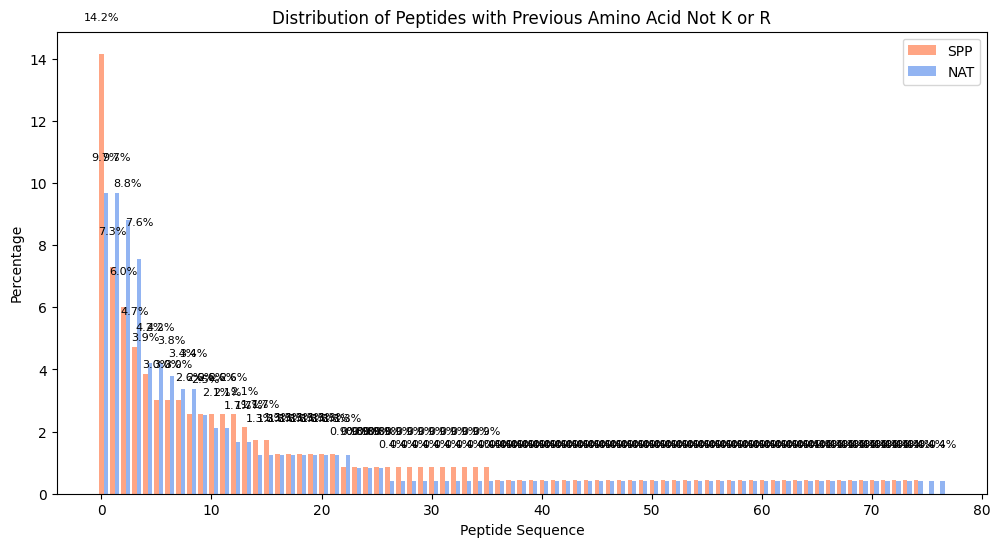

In [93]:
# Calculate the peptide counts in SPP and NAT data
spp_peptide_counts = spp_filtered_data['Peptide sequence'].value_counts()
nat_peptide_counts = nat_filtered_data['Peptide sequence'].value_counts()

# Calculate the peptide percentages in SPP and NAT data
spp_peptide_percentage = spp_peptide_counts / len(spp_filtered_data) * 100
nat_peptide_percentage = nat_peptide_counts / len(nat_filtered_data) * 100

# Sort the peptides based on the counts in descending order
spp_sorted_peptides = spp_peptide_percentage.sort_values(ascending=False)
nat_sorted_peptides = nat_peptide_percentage.sort_values(ascending=False)

# Set the figure size and adjust the width of the bars
plt.figure(figsize=(12, 6))
bar_width = 0.4

# Plot the distribution of peptides in SPP
plt.bar(range(len(spp_sorted_peptides)), spp_sorted_peptides.values, color='#FF7F50', alpha=0.7, label='SPP', width=bar_width)

# Plot the distribution of peptides in NAT
plt.bar(np.arange(len(nat_sorted_peptides)) + bar_width, nat_sorted_peptides.values, color='#6495ED', alpha=0.7, label='NAT', width=bar_width)

# Add percentage values as annotations for SPP
for i, value in enumerate(spp_sorted_peptides.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', color='black', fontsize=8)

# Add percentage values as annotations for NAT
for i, value in enumerate(nat_sorted_peptides.values):
    plt.text(i + bar_width, value + 1, f'{value:.1f}%', ha='center', va='bottom', color='black', fontsize=8)

# Set the labels and title
plt.xlabel('Peptide Sequence')
plt.ylabel('Percentage')
plt.title('Distribution of Peptides with Previous Amino Acid Not K or R')
plt.legend()

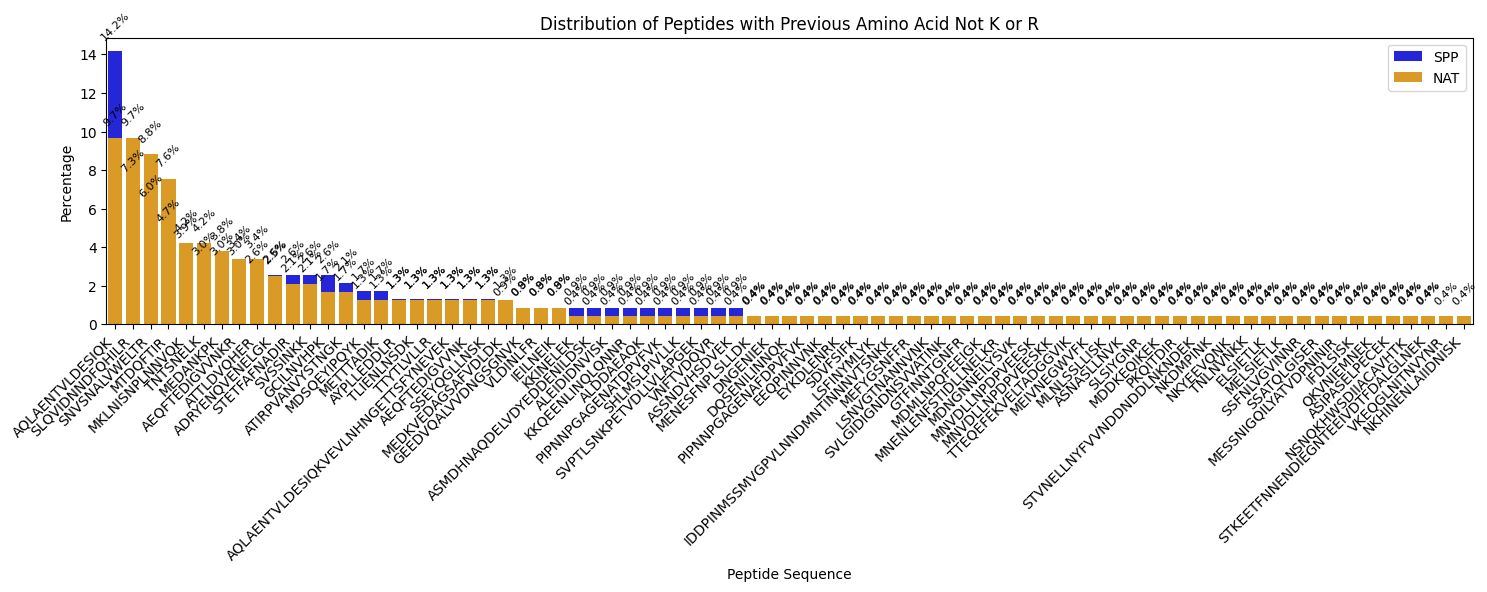

In [24]:
# # Analysis to compare the distribution of peptides meeting the criteria between SPP and NAT groups. The percentages of these peptides in each group.

# spp_peptide_counts = spp_data['Peptide sequence'].value_counts()
# nat_peptide_counts = nat_data['Peptide sequence'].value_counts()

# # Calculate and display the frequency or percentage of peptides in each group
# spp_peptide_percentage = spp_peptide_counts / len(spp_data) * 100
# nat_peptide_percentage = nat_peptide_counts / len(nat_data) * 100

# # Plot the distribution of peptides in each group

# # Set the figure size and adjust the width of the bars
# plt.figure(figsize=(15, 6))
# sns.barplot(x=spp_peptide_percentage.index, y=spp_peptide_percentage.values, color='blue', label='SPP', saturation=0.7)
# sns.barplot(x=nat_peptide_percentage.index, y=nat_peptide_percentage.values, color='orange', label='NAT', saturation=0.7)

# # Add percentage values as annotations
# for i, value in enumerate(spp_peptide_percentage.values):
#     plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', color='black', fontsize=8, rotation=45)

# for i, value in enumerate(nat_peptide_percentage.values):
#     plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', color='black', fontsize=8, rotation=45)

# # Set the labels and title
# plt.xlabel('Peptide Sequence')
# plt.ylabel('Percentage')
# plt.title('Distribution of Peptides with Previous Amino Acid Not K or R')
# plt.legend()

# # Rotate x-axis labels for better visibility
# plt.xticks(rotation=45, ha='right')

# # Adjust the spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()